## Innomatics Research Labs Hackathon Task

## Importing suitable and necessary libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score

In [2]:
data=pd.read_csv('~/Downloads/dataframe_.csv')
data

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


## Exploratory Data Analysis

## Data Cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [4]:
data.dtypes

input     float64
output    float64
dtype: object

## Missing Value Analysis

In [5]:
data.isna()

,input,output
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1692,False,False
1693,False,False
1694,False,False
1695,False,False


In [6]:
data.isna().sum()

input     1
output    1
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.shape

(1696, 2)

In [9]:
data

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


## Analysis of Duplicate Values

In [10]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1692     True
1693     True
1694     True
1695     True
1696     True
Length: 1696, dtype: bool

In [11]:
data.duplicated().any()

True

In [12]:
cleaned_data=data.drop_duplicates()

In [13]:
cleaned_data

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1105,-112.018496,121.096397
1107,-119.954237,123.609122
1108,-109.942155,127.197394
1109,-111.515368,128.170885


In [14]:
cleaned_data.columns

Index(['input', 'output'], dtype='object')

## Outlier Detection and Treatment
## using Z-Score
## Formula for Z score = (Observation — Mean)/Standard Deviation

## z = (x — μ) / σ

In [15]:
list_a=cleaned_data.input.tolist()

In [16]:
list_a

[-122.7406674,
 -121.5314194,
 -134.917019,
 -120.6059511,
 -129.8947807,
 -134.3666687,
 -115.5637388,
 -132.0801614,
 -133.3666687,
 -119.5241123,
 -125.743622,
 -133.3666687,
 -114.1008952,
 -131.3666687,
 -113.2783381,
 -133.8181748,
 -121.6535425,
 -127.3666687,
 -108.4996398,
 -111.2536771,
 -124.3666687,
 -119.1166023,
 -114.4105263,
 -122.3666687,
 -131.9053601,
 -109.2783685,
 -105.5046405,
 -122.3666687,
 -112.2579067,
 -111.0440481,
 -126.6376399,
 -120.3666687,
 -125.0856202,
 -103.409788,
 -115.2626373,
 -119.3666687,
 -104.9065286,
 -99.7125535,
 -117.3666687,
 -116.3328387,
 -125.3821591,
 -103.2199847,
 -115.3666687,
 -120.2750927,
 -113.2574809,
 -96.69835134,
 -115.3666687,
 -101.9974407,
 -111.9026024,
 -130.789929,
 -112.3666687,
 -98.94771821,
 -104.681987,
 -112.8669092,
 -110.3666687,
 -108.6044447,
 -96.69369402,
 -113.9676037,
 -109.3666687,
 -124.5036828,
 -117.2137042,
 -121.2046658,
 -107.3666687,
 -104.9610089,
 -117.6854971,
 -89.40230539,
 -103.3666687,
 

In [17]:
list_b=cleaned_data.output.tolist()

In [18]:
list_b

[-130.5720846,
 -129.9389289,
 -130.1418321,
 -125.7609321,
 -112.7852137,
 -116.0,
 -126.2676214,
 -132.0322057,
 -114.0,
 -94.41985546,
 -107.4993237,
 -113.0,
 -117.674002,
 -111.0,
 -99.43907611,
 -127.0636111,
 -128.8850301,
 -101.0,
 -96.21628083,
 -85.09071142,
 -93.0,
 -78.13927519,
 -86.81404312,
 -89.0,
 -92.18557515,
 -99.40238374,
 -76.60555952,
 -86.0,
 -85.95867942,
 -73.35306605,
 -91.74695772,
 -81.0,
 -94.93958463,
 -83.93283857,
 -80.04480123,
 -80.0,
 -95.37931257,
 -66.36818522,
 -75.0,
 -57.15089931,
 -81.82343674,
 -59.9087513,
 -70.0,
 -78.08783768,
 -59.30063103,
 -54.09911852,
 -67.0,
 -83.8759736,
 -73.79401197,
 -83.82733147,
 -61.0,
 -57.82218601,
 -76.9771902,
 -41.10723103,
 -56.0,
 -53.5821962,
 -50.94802619,
 -62.99177131,
 -55.0,
 -55.14545056,
 -69.46269683,
 -47.06037708,
 -55.0,
 -65.23538144,
 -72.97830748,
 -55.71583998,
 -52.0,
 -51.17616754,
 -62.52893536,
 -39.63824551,
 -49.0,
 -42.88038632,
 -56.09749979,
 -41.58095753,
 -47.0,
 -63.3590412,
 

In [19]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [20]:
outlier_pt=detect_outliers(list_a)
outlier_pt

[]

In [21]:
outlier_pt=detect_outliers(list_b)
outlier_pt

[]

In [22]:
cleaned_data

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1105,-112.018496,121.096397
1107,-119.954237,123.609122
1108,-109.942155,127.197394
1109,-111.515368,128.170885


## Outliers Detection using Box Plot

In [23]:
import seaborn as sns

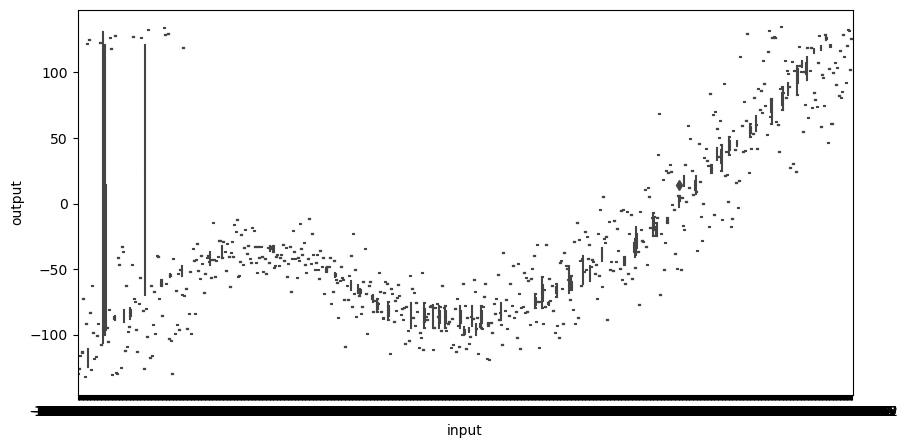

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(data=cleaned_data,x=cleaned_data.input,y=cleaned_data.output)
plt.show()

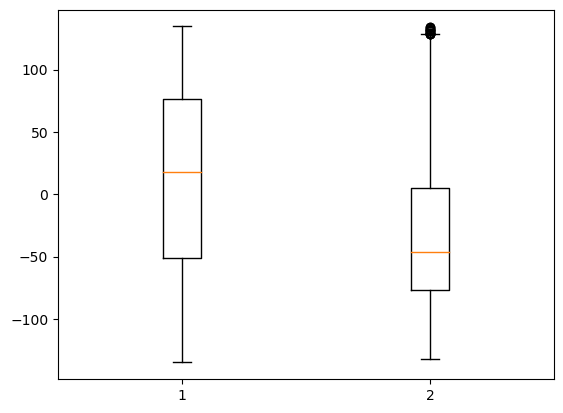

In [25]:
plt.boxplot(cleaned_data)
plt.show()

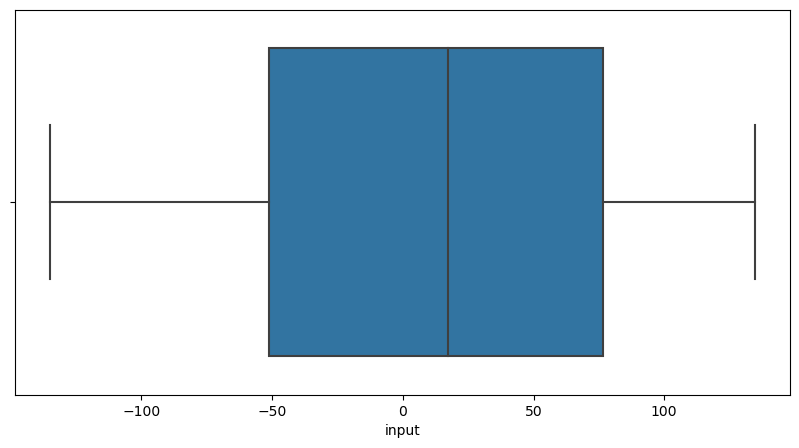

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(data=cleaned_data,x=cleaned_data.input)
plt.show()

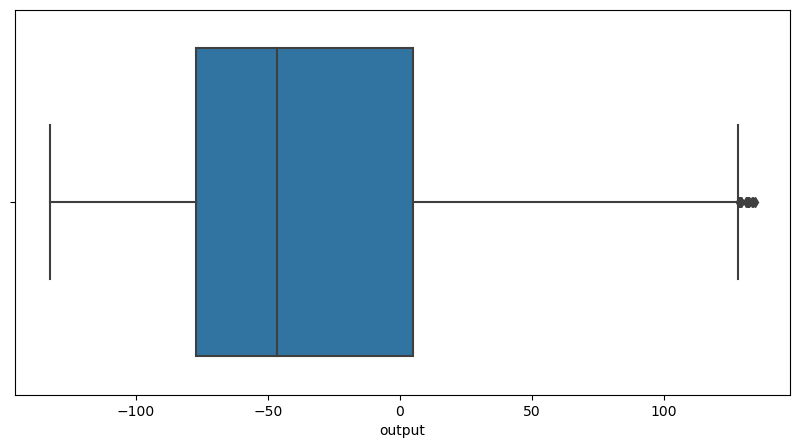

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(data=cleaned_data,x=cleaned_data.output)
plt.show()

## By above analysis there are no outliers present in the dataset

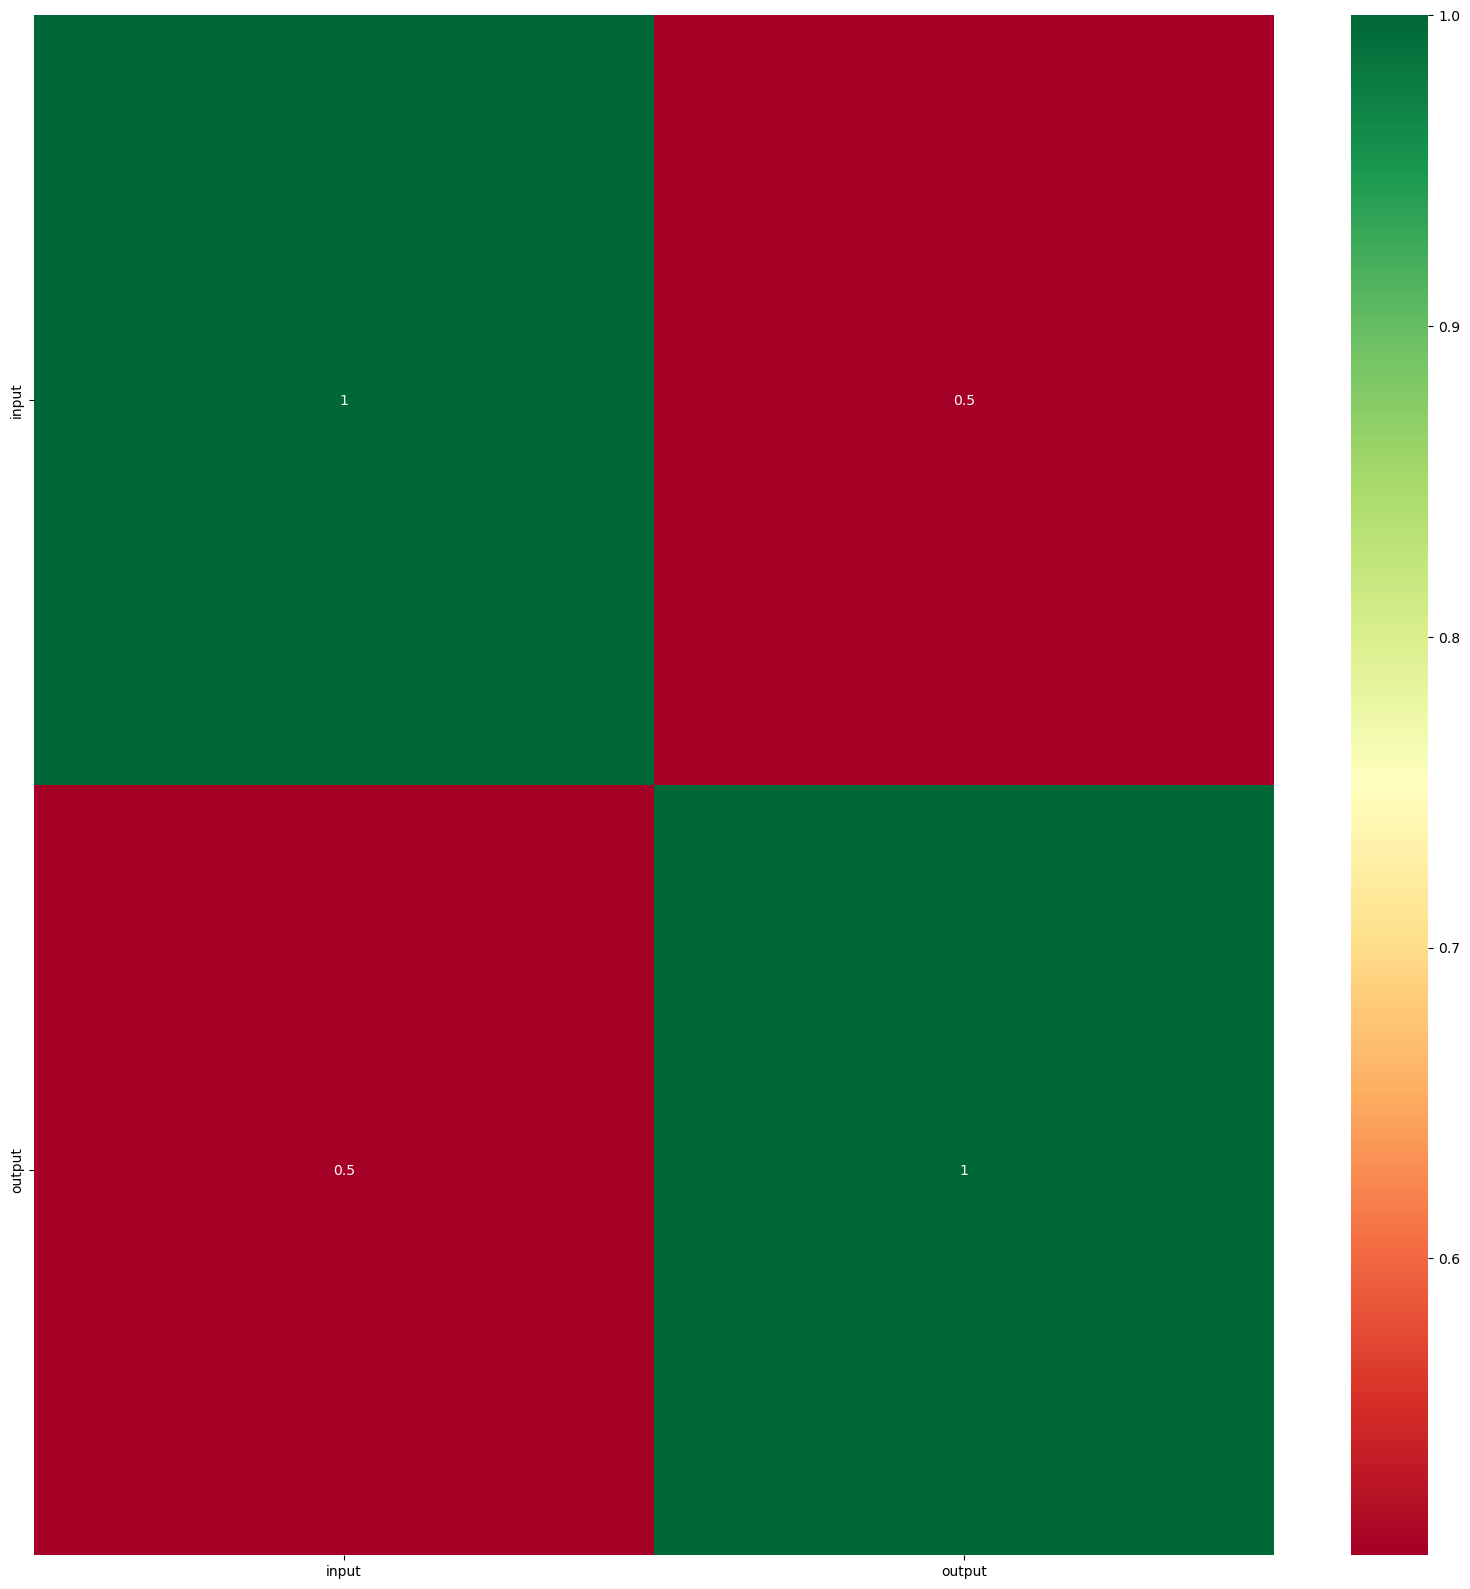

In [28]:
## Correlation
#get correlations of each features in dataset
corrmat = cleaned_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(cleaned_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [29]:
from sklearn.model_selection import train_test_split as split

In [30]:
train,test=split(cleaned_data,test_size=0.20,random_state=12)

In [31]:
x_train=train.drop(columns='output')
x_test=test.drop(columns='output')
y_train=train['output']
y_test=test['output']

In [32]:
x_train.shape

(872, 1)

In [33]:
y_train.shape

(872,)

In [34]:
x_test.shape

(218, 1)

In [35]:
y_test.shape

(218,)

## Model Prediction

## Using Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr=LinearRegression()

In [38]:
lr.fit(x_train,y_train)

LinearRegression()

In [39]:
pred_lr=lr.predict(x_test)

In [40]:
lr.score(x_test,pred_lr)

1.0

In [41]:
# regression coefficients
print('Coefficients: ', lr.coef_)

Coefficients:  [0.40954705]


In [42]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(lr.score(x_test, y_test)))

Variance score: 0.35385973357209843


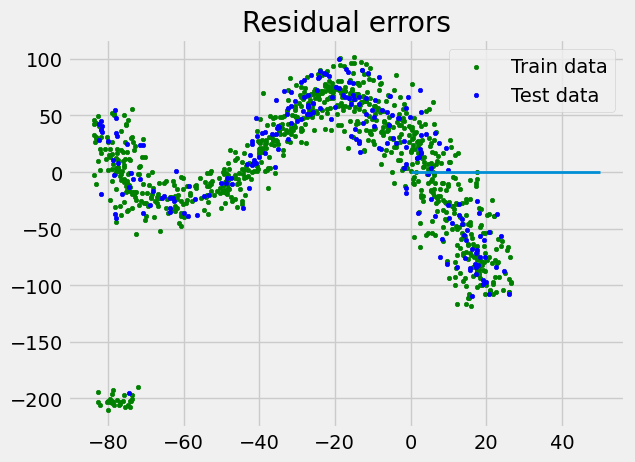

In [43]:
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(lr.predict(x_train), lr.predict(x_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(lr.predict(x_test), lr.predict(x_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

## Using Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rf=RandomForestRegressor(criterion='absolute_error',max_depth=5,oob_score=True,min_samples_split=10)

In [46]:
rf.fit(x_train,y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_split=10, oob_score=True)

In [47]:
pred_rf=rf.predict(x_test)

In [48]:
#pred_rf

In [49]:
rf.score(x_test,y_test)

0.8406835762854201

## Hyper Parameter Tuning for RandomForestRegressor

In [50]:
from sklearn.linear_model import SGDRegressor

In [51]:
sgd=SGDRegressor()

In [52]:
param_dict = {'penalty' : ['l1', 'l2'],
'l1_ratio' : [0, .15,0.25, .5, .65, 0.75, 1 ],
'learning_rate' :['constant','optimal', 'invscaling', 'adaptive'],
'eta0' : [0.1, 1, 10, 100]}

In [53]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [54]:
sgd=SGDRegressor(loss='squared_error',max_iter=10)

In [55]:
random=RandomizedSearchCV(estimator=sgd,       #using RandomizedSearchCV
                         param_distributions=param_dict,
                         scoring='r2',cv=2,
                         n_jobs=-1,
                         n_iter=10,
                         verbose=True)

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
random.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=SGDRegressor(max_iter=10), n_jobs=-1,
                   param_distributions={'eta0': [0.1, 1, 10, 100],
                                        'l1_ratio': [0, 0.15, 0.25, 0.5, 0.65,
                                                     0.75, 1],
                                        'learning_rate': ['constant', 'optimal',
                                                          'invscaling',
                                                          'adaptive'],
                                        'penalty': ['l1', 'l2']},
                   scoring='r2', verbose=True)

In [58]:
random.best_estimator_

SGDRegressor(eta0=1, l1_ratio=0.25, max_iter=10)

## Using Extreme Gradient Boosting Regressor

In [59]:
import xgboost as xg

In [60]:
clf = xg.XGBRegressor(max_depth = 1,scale_pos_weight=3,min_child_weight=10,n_jobs = -1,learning_rate=0.8)

In [61]:
res=clf.fit(x_train,y_train)

In [62]:
res.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.8, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=1, max_leaves=0, min_child_weight=10, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [63]:
pred_xg=rf.predict(x_test)

In [64]:
pred_xg

array([ 97.69569794, -86.07327552, -55.2281456 ,  76.90552225,
       -72.64775042, -42.63157525, -42.55281457,  98.54865658,
       -46.94493577, -87.77525599, -73.67945411, -41.91286502,
        76.68759545, -86.23793133,  57.89706668, -88.75365828,
       -66.60361796, -25.7405382 , -86.07327552, -86.23793133,
        57.89706668,  74.30855884, -42.39992133, -86.6933862 ,
       -84.44172979, -27.23955561,  23.27425001, -86.07327552,
       -85.18640252, -41.91286502,  76.94651043, -42.76129755,
         7.38213158, -87.15682735,  86.42668909, -86.07327552,
       -75.62489662, -73.67945411,   9.27742843, -39.16334084,
        40.92209536, -72.64775042, -72.64775042, -43.39753172,
       -53.3483085 ,  11.552334  , -92.86003935, -86.07327552,
       -42.63157525, -84.44172979,  22.39659611,   0.95206327,
       -42.14842095, -41.91286502, -42.04946948, 102.06736827,
       -42.39776446, -87.43054708, -41.91286502,  23.27425001,
        98.45589301, -58.31991494, -92.86003935, -87.77

In [65]:
res.score(x_test,y_test)

0.8020790036686699

## Using Support Vector Machine Regressor

In [66]:
from sklearn.svm import SVR

In [67]:
regressor=SVR(kernel='rbf',degree=5,C=50,epsilon=0.1,cache_size=100,max_iter=-1,verbose=True)

In [68]:
regressor.fit(x_train,y_train)

[LibSVM]

SVR(C=50, cache_size=100, degree=5, verbose=True)

In [69]:
pred_regressor=regressor.predict(x_test)

In [70]:
pred_regressor

array([ 89.1323669 , -83.61829632, -59.36864837,  72.23242247,
       -78.17868675, -53.5134293 , -50.52536297,  98.27794296,
       -53.4956293 , -88.81845445, -75.58528029, -32.6636501 ,
        87.5189681 , -86.08573581,  61.27990667, -91.59835173,
       -67.29984334, -21.35748706, -82.89640677, -86.86770928,
        60.64331948,  78.70357444, -42.15195991, -83.62628436,
       -79.53365399, -24.97632918,  28.04916679, -85.24183192,
       -81.34746182, -33.56387545,  69.34168359, -49.57490394,
        20.56390817, -86.25337516,  86.02862144, -84.74881493,
       -74.25622336, -77.73861911,  -6.4696754 , -47.73076131,
        39.76103509, -77.22668115, -77.50819769, -55.52610726,
       -56.59886327,  19.4364794 , -90.19322675, -84.04866223,
       -53.93742551, -79.24725017,  31.97420695,   7.03171106,
       -41.40242632, -32.21416129, -36.91835274, 110.58591325,
       -47.29603137, -86.95160117, -32.90471127,  27.62666861,
        91.81008688, -65.62934637, -89.01089224, -88.96

In [71]:
regressor.score(x_test,y_test)

0.8534189600373123

##  Use appropriate evaluation metrics and compare all the models and write your observations i.e. why is one model better than the other?

## I have performed total 4 algorithms such as Linear Regression, Random Forest Regressor, Extreme Bossting Regressor and finally Support Vector Machine Regressor. In the above calculations and model evaluations, Linear Regression and Support Vector Regressor have given better results and accuracy as compared rest algorithms. Logistic Regression has given 100% accuracy and Support Vector Mcahine Regressor has given 85% accuracy based on the given dataset. 
## The Linear Regression always predict the good results because it is the most commonly using algorithm for regression problems and in this analysis Support Vector Regressor also performed better, so that the Support Vector Mchine not only for Classifications but also used for Regression problems.
## Finally the conclusion is that whatever algorithms are available in  the market, that doesnot matter only few gives more accurate predictions. First apply all the algorithms on any dataset to get the perfect accuracy, because no one knows that whivh algorithm is best for this specific dataset, that is the main thing that we should consider while performing the algorithms on datasets.